<a href="https://colab.research.google.com/github/KLN-TBN/Notebooks/blob/main/PyTorch_Tensors_AlexNet_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 1 Labs

## PyTorch and Tensors

### Problem 1

Create a Python array of array or arrays (three levels of nesting). The inner most arrays should have 3 elements each the middle should have 2 and the outer should have 2 elements as represented below:

```
Array( 
    Array( 
        Array( 1, 2, 3 ), 
        Array( 4, 5, 6 ), 
    ),
    Array( 
        Array( 7 , 8 , 9  ), 
        Array( 10, 11, 12 ),
    ),
)
```

Write Python code to access each of the following elements: 2, 6, 8, 11 (one line to access and print each of these). Be sure to first initialise the array of array of arrays. 


In [ ]:
array = [[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]]
print(array[0][0][1])
print(array[0][1][2])
print(array[1][0][1])
print(array[1][1][1])

2
6
8
11


### Problem 2

Create and print the following tensors using one line of code only, *without the use of numpy (or python) arrays*: 

1.   A 1 dimentional tensor with 8 0's
2.   A 1 dimentional tensor with 8 1
3.   A 1 dimentional tensor with 8 random numbers
4.   A 1 dimentional tensor with 8 random numbers between [0, 10)
5.   A 1 dimentional tensor with 8 random integers between [0, 10)
6.   A 2 dimentional tensor consisting of all numbers [1, 9] with 3 rows.


In [ ]:
import torch
print(torch.zeros(8))
print(torch.ones(8))
print(torch.rand(8))
print(torch.rand(8).mul(10))
print(torch.rand(8).mul(10).round())
print(torch.arange(1,10).reshape((3,3)))

tensor([0., 0., 0., 0., 0., 0., 0., 0.])
tensor([1., 1., 1., 1., 1., 1., 1., 1.])
tensor([0.1699, 0.7324, 0.9903, 0.7395, 0.8645, 0.6079, 0.9351, 0.2094])
tensor([6.9584, 8.8565, 1.8917, 6.2378, 3.4298, 8.9683, 4.6505, 7.2848])
tensor([6., 5., 5., 9., 8., 5., 4., 4.])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


### Problem 3

### Problem 3a
Multiply the following matrices using PyTorch

```
| 1,  3 |      | 1, 2 |
| 2, -1 |  x   | 3, 3 | 
```

### Problem 3b

Initialise a tensor using the following code:
```
pytorch_tensor = torch.tensor( 
                       [
                         [20., 87., 78., 35., 84.],
                         [64., 71., 42., 38., 86.],
                         [92.,  8., 11., 43., 40.]
                       ]
)

```

Using splicing operations (i.e., ```pytorch_tensor[:,:]```) splice the above tensor (and print) the following: 

1. 
```  
  20., 87., 78., 35., 84.
```

2. 
```  
  20., 64., 92.
```

3. 
```  
  87., 78.
  71., 42.
   8., 11.
```

4. 
```  
  84., 86., 40.
```


In [ ]:
mat1 = torch.tensor([[1,3],[2,-1]])
mat2 = torch.tensor([[1,2],[3,3]])
print(torch.matmul(mat1,mat2))
pytorch_tensor = torch.tensor( 
                       [
                         [20., 87., 78., 35., 84.],
                         [64., 71., 42., 38., 86.],
                         [92.,  8., 11., 43., 40.]
                       ]
)
print(pytorch_tensor[:1,:])
print(torch.transpose(pytorch_tensor[:,:1],0,1))
print(pytorch_tensor[:,1:3])
print(torch.transpose(pytorch_tensor[:,4:],0,1))

tensor([[10, 11],
        [-1,  1]])
tensor([[20., 87., 78., 35., 84.]])
tensor([[20., 64., 92.]])
tensor([[87., 78.],
        [71., 42.],
        [ 8., 11.]])
tensor([[84., 86., 40.]])


## Pre-Trained Models

We are going to work with some pre-trained models. Before that, we need some tools to download and manipulate files on Google Colab. 

### Files and Linux commands - Google CoLab

**Problem 4**

Navigate to the following URL: https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch2/horse.jpg 

Download this image to your CoLab instance. You might find the following resources helpful: 

1. [Google Colab Shell](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.05-IPython-And-Shell-Commands.ipynb)
2. [wget](https://www.gnu.org/software/wget/manual/wget.html#Simple-Usage)


Use the file explorer on the left (the folder icon) to locate the file.

In [ ]:
!wget https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch2/horse.jpg

--2023-02-08 13:46:17--  https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch2/horse.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 385347 (376K) [image/jpeg]
Saving to: ‘horse.jpg’

horse.jpg           100%[===================>] 376.32K  --.-KB/s    in 0.04s   

2023-02-08 13:46:17 (8.96 MB/s) - ‘horse.jpg’ saved [385347/385347]



**Problem 5**

Install the following python packages to your colab instance: 
1. [Huggingface Transformers](https://huggingface.co/docs/transformers/installation) *NOTE*: you will NOT need to install an environment. You can do this directly with ```pip```. 
2. [Hugginface Datasets](https://huggingface.co/docs/datasets/installation) 



In [ ]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 15.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


### Problem 6


The following code initialises a version of the popular model called T5 that has been trained to answer trivia questions and runs a question through it. 

```
from transformers import AutoTokenizer, AutoModelWithLMHead

model = AutoModelWithLMHead.from_pretrained("deep-learning-analytics/triviaqa-t5-base")

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

base_tokenizer = AutoTokenizer.from_pretrained("t5-base", use_fast=False)

preprocess_text = "Which singer's real name is Stefani Joanne Angelina Germanotta?"

print( "Your question: ", preprocess_text ) 

tokenized_text = base_tokenizer.encode(preprocess_text, return_tensors="pt").to(device)

outs = model.generate(
            tokenized_text,
            max_length=20,
            num_beams=4,
            early_stopping=True
           )

dec = [base_tokenizer.decode(ids) for ids in outs]
prediction = dec[0].lstrip().rstrip().replace( "<pad> ", "" ).replace( "</s>", "" ).replace( "<extra_id_0> ", "" )

print( prediction) 

```

### Problem 6 a

Paste this code into a code block and run it. Is the answer correct?

### Problem 6 b

Restructure this code (using functions) so you can run it on multiple questions without having to reinitialise the model over and over again. Now run the following questions through the model: 

```
      "Which singer's real name is Stefani Joanne Angelina Germanotta?", 
      "What is the stage name of Stefani Joanne Angelina Germanotta?", 
      "Who sang the song Thriller which won the Grammy Award for Best Music Video?", 
      "Where is the University of Bath located?"
```

Before juding this model too harshly, read about the [different T5 models](https://huggingface.co/docs/transformers/model_doc/t5) and the number of parameters they have. 

In [ ]:
from transformers import AutoTokenizer, AutoModelWithLMHead

model = AutoModelWithLMHead.from_pretrained("deep-learning-analytics/triviaqa-t5-base")

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

base_tokenizer = AutoTokenizer.from_pretrained("t5-base", use_fast=False)

preprocess_text = "Which singer's real name is Stefani Joanne Angelina Germanotta?"

def T5(preprocess_text):
  print( "Your question: ", preprocess_text ) 

  tokenized_text = base_tokenizer.encode(preprocess_text, return_tensors="pt").to(device)

  outs = model.generate(
              tokenized_text,
              max_length=20,
              num_beams=4,
              early_stopping=True
            )

  dec = [base_tokenizer.decode(ids) for ids in outs]
  prediction = dec[0].lstrip().rstrip().replace( "<pad> ", "" ).replace( "</s>", "" ).replace( "<extra_id_0> ", "" )

  print( prediction)

T5(preprocess_text)
T5("What is the stage name of Stefani Joanne Angelina Germanotta?")
T5("Who sang the song Thriller which won the Grammy Award for Best Music Video?")
T5("Where is the University of Bath located?")

/usr/local/lib/python3.8/dist-packages/transformers/models/auto/modeling_auto.py:1248: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


Your question:  Which singer's real name is Stefani Joanne Angelina Germanotta?
Lady Gaga
Your question:  What is the stage name of Stefani Joanne Angelina Germanotta?
Lady Ga Ga
Your question:  Who sang the song Thriller which won the Grammy Award for Best Music Video?
Mike Oldfield
Your question:  Where is the University of Bath located?
Bristol


### Problem 7

Navigate to [Chapter 2](https://learning.oreilly.com/library/view/deep-learning-with/9781617295263/Text/02.xhtml#sigil_toc_id_22) of book Deep Learning with PyTorch. 

Carefully read and run the model described in Section 2.1 (up to 2.1.5). You should be able to detect bobby. 

Here are a couple of things that'll help (these will only make sense once you read the chapter. 


Split the ```preprocess``` function provided as follows so you can visualise the output of the resize and crop. 

```
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
])

tensorize = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(
           mean=[0.485, 0.456, 0.406],
           std=[0.229, 0.224, 0.225]
        )
])
```

You can download the image of bobby from: https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch2/bobby.jpg

(don't forget to use ```wget```!) 

You can download a file containing the imagenet classes from: https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt 

The files you download are downloaded to ```'/content/```, as in ```/content/bobby.jpg```


You can output the image but having img (or wherever you save the image) on a seperate cell in the notebook.


In [ ]:
!wget https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch2/bobby.jpg
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2023-02-08 13:47:29--  https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch2/bobby.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75801 (74K) [image/jpeg]
Saving to: ‘bobby.jpg’

bobby.jpg           100%[===================>]  74.02K  --.-KB/s    in 0.02s   

2023-02-08 13:47:29 (4.59 MB/s) - ‘bobby.jpg’ saved [75801/75801]

--2023-02-08 13:47:29--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/p

In [ ]:
# In[1]:
from torchvision import models
# In[2]:
dir(models)
# Out[2]:
# ['AlexNet',
#  'DenseNet',
#  'Inception3',
#  'ResNet',
#  'SqueezeNet',
#  'VGG',
# ...
#  'alexnet',
#  'densenet',
#  'densenet121',
# ...
#  'resnet',
#  'resnet101',
#  'resnet152',
# ...
#  ]
# In[3]:
alexnet = models.AlexNet()
# In[4]:
resnet = models.resnet101(pretrained=True)
# In[5]:
#resnet
 
# Out[5]:
# ResNet(
#   (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3),
#                   bias=False)
#   (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True,
#                      track_running_stats=True)
#   (relu): ReLU(inplace)
#   (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1,
#                        ceil_mode=False)
#   (layer1): Sequential(
#     (0): Bottleneck(
# ...
#     )
#   )
#   (avgpool): AvgPool2d(kernel_size=7, stride=1, padding=0)
#   (fc): Linear(in_features=2048, out_features=1000, bias=True)
# )
# In[6]:
from torchvision import transforms
# preprocess = transforms.Compose([
#         transforms.Resize(256),
#         transforms.CenterCrop(224),
#         transforms.ToTensor(),
#         transforms.Normalize(
#             mean=[0.485, 0.456, 0.406],
#             std=[0.229, 0.224, 0.225]
#         )])
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
])
tensorize = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(
           mean=[0.485, 0.456, 0.406],
           std=[0.229, 0.224, 0.225]
        )
])
# In[7]:
from PIL import Image
#def MyAlexNet(imageLocation):
img = Image.open("/content/bobby.jpg")
# In[8]:
#img
# Out[8]:
# <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720 at
#  0x1B1601360B8>
# In[9]:
img_t = preprocess(img)
img_t = tensorize(img_t)
# In[10]:
#import torch
batch_t = torch.unsqueeze(img_t, 0)
# In[11]:
resnet.eval()

# Out[11]:
# ResNet(
#   (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3),
#                   bias=False)
#   (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True,
#                      track_running_stats=True)
#   (relu): ReLU(inplace)
#   (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1,
#                        ceil_mode=False)
#   (layer1): Sequential(
#     (0): Bottleneck(
# ...
#     )
#   )
#   (avgpool): AvgPool2d(kernel_size=7, stride=1, padding=0)
#   (fc): Linear(in_features=2048, out_features=1000, bias=True)
# )
# In[12]:
out = resnet(batch_t)
#out

# Out[12]:
# tensor([[ -3.4803,  -1.6618,  -2.4515,  -3.2662,  -3.2466,  -1.3611,
#           -2.0465,  -2.5112,  -1.3043,  -2.8900,  -1.6862,  -1.3055,
# ...
#            2.8674,  -3.7442,   1.5085,  -3.2500,  -2.4894,  -0.3354,
#            0.1286,  -1.1355,   3.3969,   4.4584]])
# In[13]:
with open('/content/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
# In[14]:
_, index = torch.max(out, 1)
# In[15]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

# Out[15]:
# ('golden retriever', 96.29334259033203)
# In[16]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

# Out[16]:
# [('golden retriever', 96.29334259033203),
#  ('Labrador retriever', 2.80812406539917),
#  ('cocker spaniel, English cocker spaniel, cocker', 0.28267428278923035),
#  ('redbone', 0.2086310237646103),
#  ('tennis ball', 0.11621569097042084)]

#print(labels[index[0]] + ": " + str(percentage[index[0]].item()) + "%")

#MyAlexNet("/content/bobby.jpg")

[('golden retriever', 96.29335021972656),
 ('Labrador retriever', 2.8081188201904297),
 ('cocker spaniel', 0.2826734781265259),
 ('redbone', 0.2086300402879715),
 ('tennis ball', 0.11621593683958054)]

### Problem 8 a

Now run the model on the following image: https://upload.wikimedia.org/wikipedia/commons/d/d0/German_Shepherd_-_DSC_0346_%2810096362833%29.jpg 


### Problem 8 b

Now run the model on the same image, but use the following updated version of the transform to be able to crop the image correctly.

```
def crop800(image):
    return crop(image, 5, 40, 180, 180)

preprocess = transforms.Compose([
        transforms.Lambda(crop800),
        transforms.Resize(256),
])
```



In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/d/d0/German_Shepherd_-_DSC_0346_%2810096362833%29.jpg

--2023-02-08 14:26:23--  https://upload.wikimedia.org/wikipedia/commons/d/d0/German_Shepherd_-_DSC_0346_%2810096362833%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113852 (111K) [image/jpeg]
Saving to: ‘German_Shepherd_-_DSC_0346_(10096362833).jpg’

German_Shepherd_-_D 100%[===================>] 111.18K  --.-KB/s    in 0.1s    

2023-02-08 14:26:23 (999 KB/s) - ‘German_Shepherd_-_DSC_0346_(10096362833).jpg’ saved [113852/113852]



In [ ]:
def MyAlexNet(imagePath):
  dir(models)

  alexnet = models.AlexNet()

  resnet = models.resnet101(pretrained=True)

  preprocess = transforms.Compose([
          transforms.Resize(256),
          transforms.CenterCrop(224),
  ])
  tensorize = transforms.Compose([
          transforms.ToTensor(),
          transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
          )
  ])

  img = Image.open(imagePath)

  img_t = preprocess(img)
  img_t = tensorize(img_t)

  batch_t = torch.unsqueeze(img_t, 0)

  resnet.eval()

  out = resnet(batch_t)

  with open('/content/imagenet_classes.txt') as f:
      labels = [line.strip() for line in f.readlines()]

  _, index = torch.max(out, 1)

  percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
  labels[index[0]], percentage[index[0]].item()

  _, indices = torch.sort(out, descending=True)
  print([(labels[idx], percentage[idx].item()) for idx in indices[0][:5]])

MyAlexNet("/content/German_Shepherd_-_DSC_0346_(10096362833).jpg")

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[('German shepherd', 97.96184539794922), ('Leonberg', 0.7852769494056702), ('malinois', 0.25333136320114136), ('Tibetan mastiff', 0.1988629400730133), ('dingo', 0.08864262700080872)]


In [ ]:
def MyAlexNetCustomCrop(imagePath, cropping):
  dir(models)

  alexnet = models.AlexNet()

  resnet = models.resnet101(pretrained=True)

  def crop800(image):
      return transforms.functional.crop(image, 5, 40, 180, 180)

  preprocess = transforms.Compose([
          transforms.Lambda(crop800),
          transforms.Resize(256),
  ])
  tensorize = transforms.Compose([
          transforms.ToTensor(),
          transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
          )
  ])

  img = Image.open(imagePath)

  img_t = preprocess(img)
  img_t = tensorize(img_t)

  batch_t = torch.unsqueeze(img_t, 0)

  resnet.eval()

  out = resnet(batch_t)

  with open('/content/imagenet_classes.txt') as f:
      labels = [line.strip() for line in f.readlines()]

  _, index = torch.max(out, 1)

  percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
  labels[index[0]], percentage[index[0]].item()

  _, indices = torch.sort(out, descending=True)
  print([(labels[idx], percentage[idx].item()) for idx in indices[0][:5]])
MyAlexNetCustomCrop("/content/German_Shepherd_-_DSC_0346_(10096362833).jpg",(5, 40, 180, 180))

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[('German shepherd', 81.38858795166016), ('malinois', 1.4897280931472778), ('briard', 1.3143991231918335), ('bloodhound', 1.287936806678772), ('Leonberg', 1.2510497570037842)]


### Problem 9

Now classify the following images. Make necessary changes to the crop transform to help the model classify the images correctly. 

1. https://cdn.shopify.com/s/files/1/0137/6210/1348/collections/87399596132_3000x.jpg?v=1629297832
2. https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Chou-fleur_02.jpg/1920px-Chou-fleur_02.jpg


In [ ]:
!wget https://cdn.shopify.com/s/files/1/0137/6210/1348/collections/87399596132_3000x.jpg?v=1629297832
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Chou-fleur_02.jpg/1920px-Chou-fleur_02.jpg

--2023-02-08 14:42:01--  https://cdn.shopify.com/s/files/1/0137/6210/1348/collections/87399596132_3000x.jpg?v=1629297832
Resolving cdn.shopify.com (cdn.shopify.com)... 23.227.60.200
Connecting to cdn.shopify.com (cdn.shopify.com)|23.227.60.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210856 (206K) [image/jpeg]
Saving to: ‘87399596132_3000x.jpg?v=1629297832’

87399596132_3000x.j 100%[===================>] 205.91K  --.-KB/s    in 0.01s   

2023-02-08 14:42:01 (19.1 MB/s) - ‘87399596132_3000x.jpg?v=1629297832’ saved [210856/210856]

--2023-02-08 14:42:01--  https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Chou-fleur_02.jpg/1920px-Chou-fleur_02.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 227512 (222K) [image/jpeg]
Saving to: ‘1920px-Chou-fleur_02

In [ ]:
MyAlexNet("/content/1920px-Chou-fleur_02.jpg")
MyAlexNetCustomCrop("/content/1920px-Chou-fleur_02.jpg",(5, 40, 180, 180))

[('cauliflower', 99.96888732910156), ('broccoli', 0.022288348525762558), ('head cabbage', 0.0074225617572665215), ('mashed potato', 0.0003626495017670095), ('meat loaf', 0.00021928049682173878)]
[('kite', 18.235502243041992), ('bee eater', 6.677630424499512), ('black stork', 5.462522983551025), ('bald eagle', 5.189955711364746), ('parachute', 4.111770153045654)]


In [ ]:
MyAlexNet("/content/87399596132_3000x.jpg?v=1629297832")
MyAlexNetCustomCrop("/content/87399596132_3000x.jpg?v=1629297832",(5, 40, 180, 180))

[('tiger shark', 99.57426452636719), ('sturgeon', 0.11358162015676498), ('great white shark', 0.09069334715604782), ('hammerhead', 0.06528984010219574), ('coho', 0.041178569197654724)]
[('velvet', 40.54194641113281), ('coral reef', 6.700540542602539), ('dugong', 5.990199565887451), ('wreck', 3.692988395690918), ('grey whale', 3.478036403656006)]


### Problem 9

Run the CycleGAN model described in Section 2.2.

Included below is the code that is mysteriously missing from Section 2.2 of the book. 

You will additionally need the model weights available at https://github.com/deep-learning-with-pytorch/dlwpt-code/raw/master/data/p1ch2/horse2zebra_0.4.0.pth (use ```wget``` to download)

You can download the image to transfer from https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch2/horse.jpg 



In [ ]:
!wget https://github.com/deep-learning-with-pytorch/dlwpt-code/raw/master/data/p1ch2/horse2zebra_0.4.0.pth
!wget https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch2/horse.jpg

--2023-02-08 15:33:36--  https://github.com/deep-learning-with-pytorch/dlwpt-code/raw/master/data/p1ch2/horse2zebra_0.4.0.pth
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch2/horse2zebra_0.4.0.pth [following]
--2023-02-08 15:33:37--  https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch2/horse2zebra_0.4.0.pth
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45519250 (43M) [application/octet-stream]
Saving to: ‘horse2zebra_0.4.0.pth’

horse2zebra_0.4.0.p 100%[===================>]  43.41M   162MB/s    in 0.

In [ ]:
# In[1]:
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

# In[2]:
netG = ResNetGenerator()

# In[3]:
model_path = '/content/horse2zebra_0.4.0.pth'
model_data = torch.load(model_path)
netG.load_state_dict(model_data)

# In[4]:
netG.eval()
 
# Out[4]:
# ResNetGenerator(
#   (model): Sequential(
# ...
#   )
# )

# In[5]:
# from PIL import Image
# from torchvision import transforms

# In[6]:
preprocess = transforms.Compose([transforms.Resize(256),
                                 transforms.ToTensor()])

# In[7]:
img = Image.open("/content/horse-3.jpg")#("/content/_102512274_gettyimages-518360318.jpg")#("/content/horse.jpg.1")
#img

# In[8]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

# In[9]:
batch_out = netG(batch_t)

# In[10]:
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
out_img.save('/content/zebra.jpg')
#out_img
 
# Out[10]:
#<PIL.Image.Image image mode=RGB size=316x256 at 0x23B24634F98>

In [ ]:
!wget https://ichef.bbci.co.uk/news/976/cpsprodpb/B875/production/_102512274_gettyimages-518360318.jpg

--2023-02-08 15:56:24--  https://ichef.bbci.co.uk/news/976/cpsprodpb/B875/production/_102512274_gettyimages-518360318.jpg
Resolving ichef.bbci.co.uk (ichef.bbci.co.uk)... 2.20.136.184, 2600:1417:e800:183::f33, 2600:1417:e800:18f::f33, ...
Connecting to ichef.bbci.co.uk (ichef.bbci.co.uk)|2.20.136.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63734 (62K) [image/jpeg]
Saving to: ‘_102512274_gettyimages-518360318.jpg’

_102512274_gettyima 100%[===================>]  62.24K  --.-KB/s    in 0.02s   

2023-02-08 15:56:25 (2.95 MB/s) - ‘_102512274_gettyimages-518360318.jpg’ saved [63734/63734]



In [ ]:
!wget https://a-z-animals.com/media/horse-3.jpg

--2023-02-08 16:02:30--  https://a-z-animals.com/media/horse-3.jpg
Resolving a-z-animals.com (a-z-animals.com)... 172.67.41.197, 104.22.1.252, 104.22.0.252, ...
Connecting to a-z-animals.com (a-z-animals.com)|172.67.41.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62735 (61K) [image/jpeg]
Saving to: ‘horse-3.jpg’

horse-3.jpg         100%[===================>]  61.26K  --.-KB/s    in 0.01s   

2023-02-08 16:02:30 (4.34 MB/s) - ‘horse-3.jpg’ saved [62735/62735]



### Problem 10

Run the model detailed in Section 2.3 of the book. 

You will need to clone the git repository containing the model. You can use: 

```
!git clone https://github.com/deep-learning-with-pytorch/ImageCaptioning.pytorch.git
```

You can navigate to the correct directory using: 

```
%cd /content/ImageCaptioning.pytorch/
```
(Consider why you must use "%" instead of "!" as one does in all previous commands) 



In [ ]:
!git clone https://github.com/deep-learning-with-pytorch/ImageCaptioning.pytorch.git
%cd /content/ImageCaptioning.pytorch/

Cloning into 'ImageCaptioning.pytorch'...
remote: Enumerating objects: 515, done.
remote: Total 515 (delta 0), reused 0 (delta 0), pack-reused 515
Receiving objects: 100% (515/515), 206.53 MiB | 22.37 MiB/s, done.
Resolving deltas: 100% (327/327), done.
Updating files: 100% (28/28), done.
/content/ImageCaptioning.pytorch


In [ ]:
!python eval.py --model /content/ImageCaptioning.pytorch/data/FC/fc-model.pth --infos_path /content/ImageCaptioning.pytorch/data/FC/fc-infos.pkl --image_folder /content

DataLoaderRaw loading images from folder:  /content
0
listing all images in directory /content
DataLoaderRaw found  7  images
/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/ImageCaptioning.pytorch/models/FCModel.py:147: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  logprobs = F.log_softmax(self.logit(output))
/content/ImageCaptioning.pytorch/models/FCModel.py:123: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  logprobs = F.log_so

### Problem 11

The following code snippet can be used to calculate the gradiant of ```y = 12 - (4 * x) + (2 * x**2 )``` at ```x = 1```
```  
  x = torch.tensor( 1 , dtype=float ) 
  x.requires_grad = True
  y = 12 - (4 * x) + (2 * x**2 )
  y.backward() 
  print( x.grad ) 
```

Write a loop to find the gradient at values of x between -10 and 10. store x, y, and x.grad in arrays so you can plote them using the following code snippet: 

```
import matplotlib
import matplotlib.pyplot as plt
plt.scatter(xs, ys )
plt.scatter(xs, gxs)
plt.show()
```

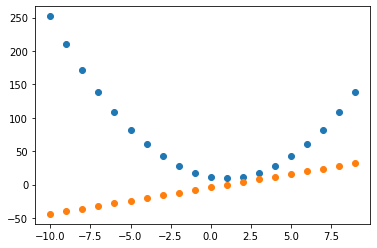

In [ ]:
xs = list()
ys = list()
gxs= list()
for x_scalar in range( -10, 10, 1):
  x = torch.tensor ( x_scalar, dtype=float)
  x.requires_grad =True
  y= 12 - (4 * x) + (2 * x**2 )
  y.backward()
  xs.append(x_scalar)
  ys.append( y.detach().numpy() )
  gxs.append(x.grad.detach().numpy() )
import matplotlib
import matplotlib.pyplot as plt
plt.scatter(xs, ys )
plt.scatter(xs, gxs)
plt.show()

### Problem 11

Repeat the above for the following equestion: 

```
y = 12 + (40 * x) - (12 * x**2 ) - ( 0.1 * x**3) + ( 1 * x**4 ) 
```  

**Be sure to increment the value of x by 0.1**

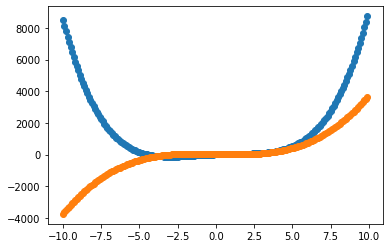

In [ ]:
xs = list()
ys = list()
gxs= list()
import numpy as np
for x_scalar in np.arange( -10, 10, 0.1):
  x = torch.tensor ( x_scalar, dtype=float)
  x.requires_grad =True
  y = 12 + (40 * x) - (12 * x**2 ) - ( 0.1 * x**3) + ( 1 * x**4 )
  y.backward()
  xs.append(x_scalar)
  ys.append( y.detach().numpy() )
  gxs.append(x.grad.detach().numpy() )
plt.scatter(xs, ys )
plt.scatter(xs, gxs)
plt.show()